In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate, accuracy
import gdown

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
PATH_IMG = Path('/content/drive/My Drive/tomato/')

In [0]:
bs = 16 # batch_size

In [0]:
img_data = ImageDataBunch.from_folder(path=PATH_IMG, train='train', valid='val', ds_tfms=get_transforms(), size=224, bs=bs)

In [0]:
img_data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (12447 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
early blight,early blight,early blight,early blight,early blight
Path: /content/drive/My Drive/tomato;

Valid: LabelList (3105 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
bacterial spot,bacterial spot,bacterial spot,bacterial spot,bacterial spot
Path: /content/drive/My Drive/tomato;

Test: None

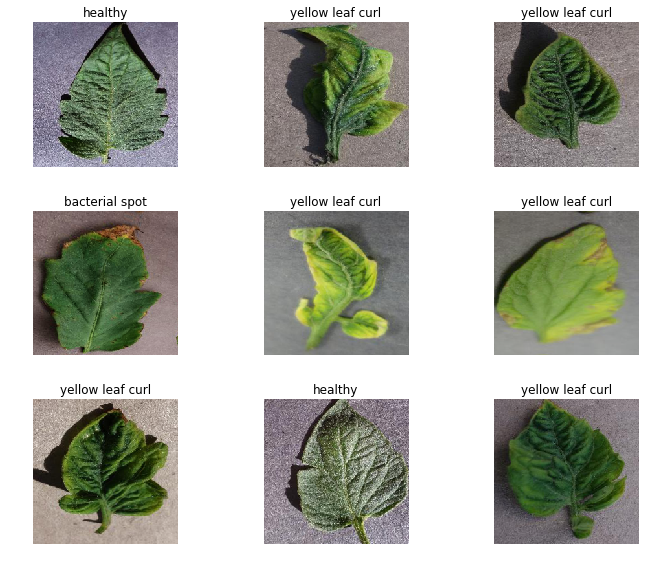

In [0]:
img_data.show_batch(rows=3, figsize=(10,8))

In [0]:
img_data.c

8

In [0]:
img_data.classes

['bacterial spot',
 'early blight',
 'healthy',
 'late blight',
 'mosaic virus',
 'septoria leaf spot',
 'target spot',
 'yellow leaf curl']

In [0]:
model = cnn_learner(img_data, models.resnet34, metrics=[accuracy, error_rate])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:02<00:00, 34362772.42it/s]


In [0]:
model.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.432563,0.187651,0.938486,0.061514,47:33
1,0.231399,0.073762,0.972625,0.027375,02:30
2,0.187051,0.049659,0.983575,0.016425,02:20
3,0.142580,0.045074,0.985507,0.014493,02:16
4,0.113705,0.038852,0.987118,0.012882,02:10


In [0]:
model.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.122871,0.040082,0.986473,0.013527,02:09
1,0.120819,0.037459,0.987118,0.012882,02:08


In [0]:
model.save('train_7_cycles')

In [0]:
interpret = ClassificationInterpretation.from_learner(model)

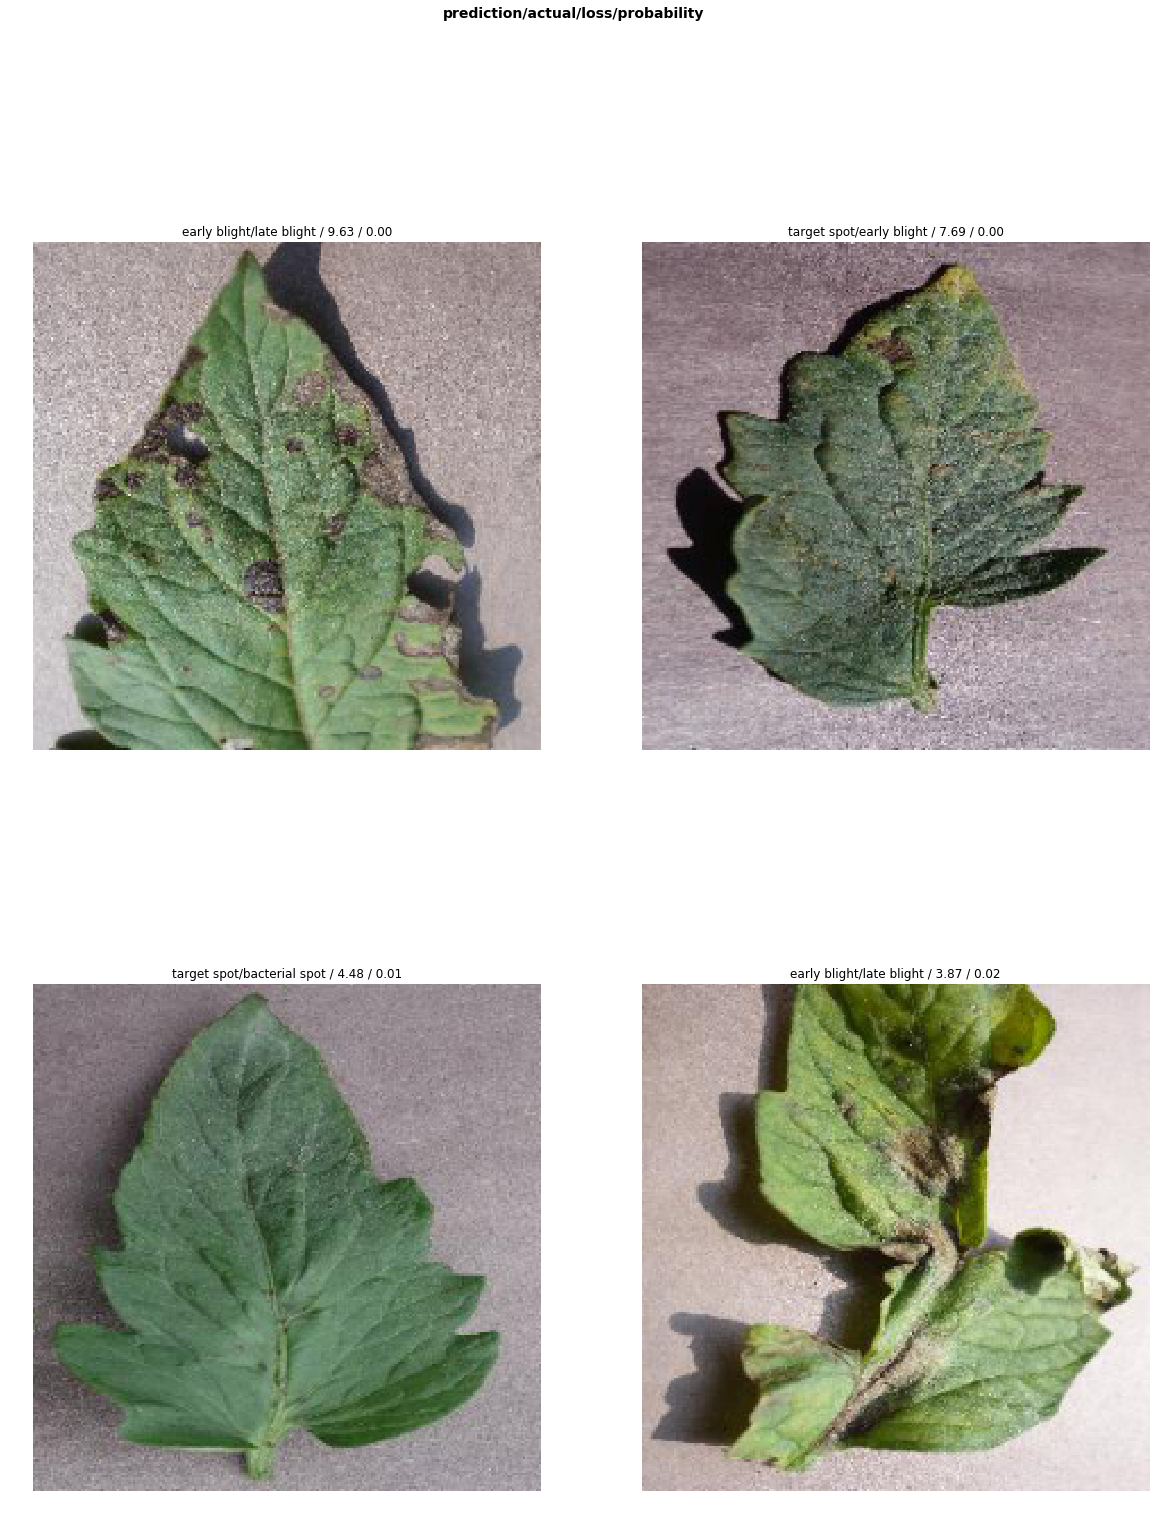

In [0]:
interpret.plot_top_losses(4, figsize=(20, 25))

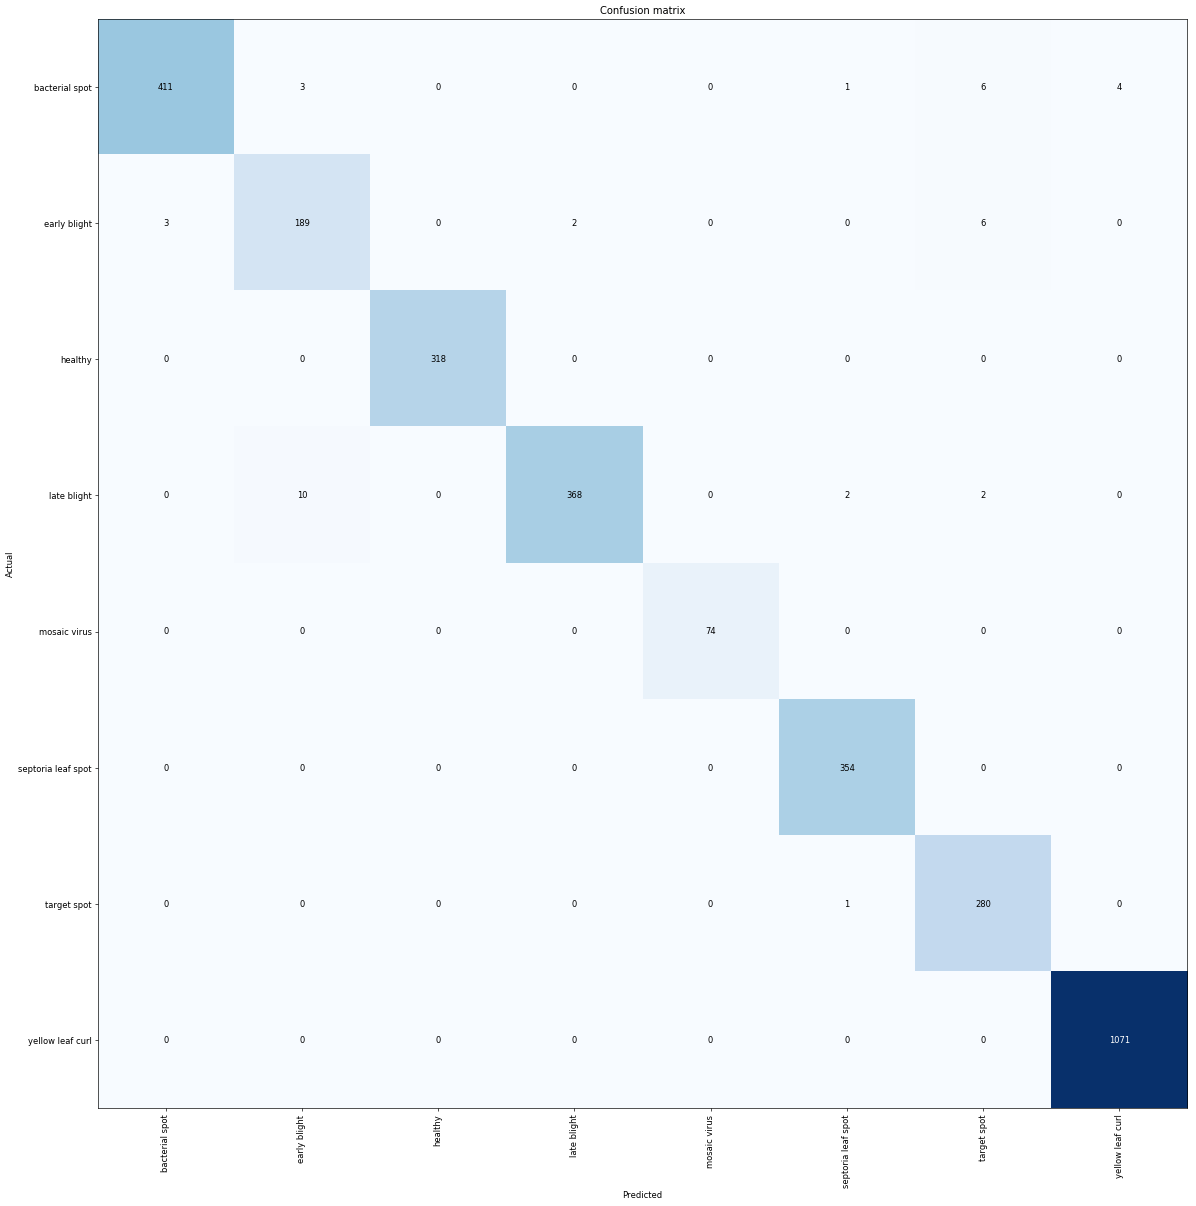

In [0]:
interpret.plot_confusion_matrix(figsize=(20,20), dpi=60)

In [0]:
model.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [0]:
model.unfreeze()
model.fit_one_cycle(3, max_lr=slice(1e-03, 1e-02))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.436873,0.572459,0.803865,0.196135,02:18
1,0.308436,15.784832,0.907890,0.092110,02:20
2,0.137038,0.056080,0.980998,0.019002,02:22


In [0]:
model.fit_one_cycle(5, max_lr=slice(1e-03, 1e-02))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.314363,21.073347,0.938164,0.061836,02:21
1,0.312442,0.173223,0.943639,0.056361,02:22
2,0.240648,433.310638,0.850564,0.149436,02:22
3,0.127264,6.695634,0.956844,0.043156,02:21
4,0.083207,17.783472,0.954911,0.045089,02:21


In [0]:
model.save('train_lr_8_cycles')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


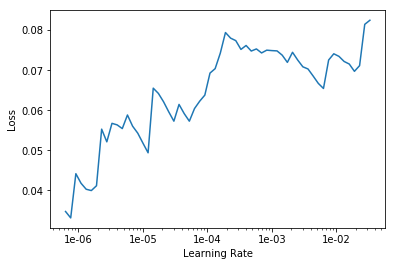

In [0]:
model.freeze()
model.lr_find()
model.recorder.plot()

In [0]:
lr = 1e-3/2
model.fit_one_cycle(2, slice(lr))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.066323,0.028708,0.990982,0.009018,02:12
1,0.073594,0.028098,0.990338,0.009662,02:13


In [0]:
model.fit_one_cycle(3, slice(lr))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.078149,0.027455,0.988728,0.011272,02:12
1,0.062156,0.027421,0.989694,0.010306,02:13
2,0.091924,8.553911,0.952335,0.047665,02:12


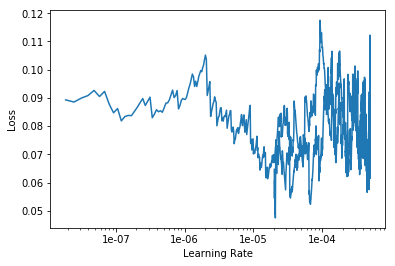

In [0]:
model.recorder.plot()

In [0]:
model.save('train_final5_cycles')

In [0]:
model.load('train_final5_cycles')

Learner(data=ImageDataBunch;

Train: LabelList (12447 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
early blight,early blight,early blight,early blight,early blight
Path: /content/drive/My Drive/tomato;

Valid: LabelList (3105 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
bacterial spot,bacterial spot,bacterial spot,bacterial spot,bacterial spot
Path: /content/drive/My Drive/tomato;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride

In [0]:
model.export('export_resnet34_model.pkl')